# Mini projet n°1

## Introduction

Tous les deux ans, si l'on regarde la position de Mars depuis la Terre par rapport à la voute céleste, la planète rouge semble faire un bref demi-tour, avant de repartir dans sa direction initiale. Ce mouvement rétrograde est observé depuis l'antiquité.
Pour observer ce mouvement rétrograde, on va modéliser les mouvements de la Terre et de Mars autour du soleil, et ainsi obtenir la longitude de Mars par rapport à la terre.

## Mise en équation

On assimilera les trajectoires elliptiques des deux planètes comme des mouvements circulaires et uniformes. De plus, Mars ayant une inclinaison faible, on pourra également considérer les trajectoires comme coplanaires et donc étudier le problème en 2D.

Les mouvements de la Terre en fonction du temps x et y seront donc:
$$x1=\cos(\varphi+2*\pi*\frac{t}{T1})*R1$$
$$y1=\sin(\varphi+2*\pi*\frac{t}{T1})*R1$$
avec T1= 365 jours soit la période de révolution terrestre, R1= 1 UA, le rayon de l'orbite terrestre et $\varphi$ un déphasage.

Les mouvements de Mars en fonction du temps en x et y:
$$x2=\cos(\varphi+2*\pi*\frac{t}{T2})*R2$$
$$y2=\sin(\varphi+2*\pi*\frac{t}{T2})*R2$$
avec T2= 687 jours soit la période de révolution marsienne, R2= 1,52371 UA, le rayon de l'orbite marsienne et $\varphi$ un déphasage.

Grâce à ces équations on pourra avoir l'angle entre la droite passant par la Terre et une étoile lointaine et la droite passant par la Terre et Mars, qui est aussi la longitude de Mars par rapport à la Terre: 
$$\phi=\arctan(\frac{x2-x1}{y2-y1})$$


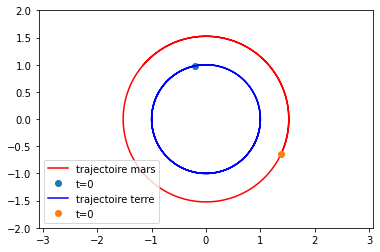

In [1]:
#importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#valuers des constantes
pi=np.pi
phi=240.5*(pi/180) #déphasage équivalent au centre de la boucle de rétrograde
T1=365
R1= 1
T2=687
R2= 1.52371

t= np.linspace(-506, 494, 900) #création d'un tableau temps avec même nombre de dates que dans les données et 506 date centre de la boucle

#création des tableaux equivalents aux équations de mouvements  
x1= np.cos(phi+2*pi*(t/T1))*R1
y1= np.sin(phi+2*pi*(t/T1))*R1
x2= np.cos(phi+2*pi*(t/T2))*R2
y2= np.sin(phi+2*pi*(t/T2))*R2

#creation du graphique 1 representant les deux trajectoires
plt.plot(x2,y2, label='trajectoire mars', color='r')
plt.plot(x1[0], y1[0], 'o', label='t=0')
plt.plot(x1,y1, label='trajectoire terre', color='b')
plt.plot(x2[0], y2[0], 'o', label='t=0')
plt.legend()
plt.axis("equal")
plt.xlim(-1.5,1.5)
plt.ylim(-2,2)
plt.show()



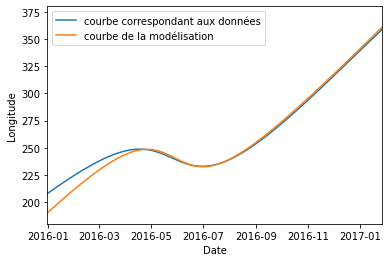

In [2]:
#on a deja importé les bibliothèques necessaires

# importation des données necessaires au graphique 2

DM= pd.read_csv('DataMars.csv',comment='#') #import du tableau de données
date= np.array(DM['Date'], dtype='datetime64[D]')#création d'un tableau date
longitude= np.array(DM['Longitude (decimal)'])# création d'un tableau longitude
exp= np.arctan2(y2-y1,x2-x1)*(180/pi)+360 #création tableau des longitudes modélisées 
 
#mise en forme du graphique 2
plt.xlabel('Date')
plt.ylabel('Longitude')
plt.xlim(16800,17193)
plt.ylim(180,380)
plt.plot(date,longitude, label='courbe correspondant aux données')
plt.plot(date, exp, label='courbe de la modélisation')
plt.legend()

# Conclusion

On constate que la courbe des longitudes modélisées et celle des longitudes relevées se surperposent quasiment dans le graphique. On en déduit que la modélisation s'approche fortement des observations réelles lors du mouvement rétrograde de Mars. Les longitudes sont même égales en mai 2016, date a laquelle le mouvement rétrograde a été observé.

Le modèle pourrait aussi être amélioré en prenant en compte la trajectoire réelle des planetes, elliptique.

Ilona LEVY